## FIJI SIR MODEL WITH 3 PORTS Nadi International Airport (NAN),Nausori International Airport (SUV), SUVA port 

In [3]:
# Importing required libraries
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Define the Port class to encapsulate the behavior and characteristics of each port
class Port:
    def __init__(self, n_agents, local_ratio, foreign_ratio, x_dim, y_dim, recovery_prob, infection_prob, initial_foreign_infection_prob):
        self.n_agents = n_agents
        self.local_ratio = local_ratio
        self.foreign_ratio = foreign_ratio
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.recovery_prob = recovery_prob
        self.infection_prob = infection_prob
        self.initial_foreign_infection_prob = initial_foreign_infection_prob
        
        # Initialize agents
        self.agents = []
        for _ in range(self.n_agents):
            # Randomly set agent as local or foreign
            is_local = random.choices([True, False], [self.local_ratio, self.foreign_ratio])[0]
            
            # Randomly set initial state based on whether the agent is foreign or not
            if is_local:
                initial_state = 'Healthy'
            else:
                initial_state = random.choices(['Healthy', 'Infected'], [1 - self.initial_foreign_infection_prob, self.initial_foreign_infection_prob])[0]
            
            # Randomly set initial position
            x = random.uniform(0, self.x_dim)
            y = random.uniform(0, self.y_dim)
            
            self.agents.append({'is_local': is_local, 'state': initial_state, 'x': x, 'y': y})
            
    def distance(self, agent1, agent2):
        return math.sqrt((agent1['x'] - agent2['x'])**2 + (agent1['y'] - agent2['y'])**2)
    
    def step(self, contact_distance):
        # Update each agent
        for agent in self.agents:
            # If agent is Infected, they have a chance to recover
            if agent['state'] == 'Infected':
                if random.uniform(0, 1) < self.recovery_prob:
                    agent['state'] = 'Recovered'
            
            # If agent is Healthy, they have a chance to get infected if in contact with an Infected agent
            if agent['state'] == 'Healthy':
                for other_agent in self.agents:
                    if other_agent['state'] == 'Infected':
                        if self.distance(agent, other_agent) < contact_distance:
                            if random.uniform(0, 1) < self.infection_prob:
                                agent['state'] = 'Infected'
                                break  # No need to check other agents once infected
                                
    def count_states(self):
        counts = {'Healthy': 0, 'Infected': 0, 'Recovered': 0}
        for agent in self.agents:
            counts[agent['state']] += 1
        return counts

In [5]:
# Initialize parameters for the three ports
port1_params = {
    'n_agents': 3000,
    'local_ratio': 0.13,
    'foreign_ratio': 0.87,
    'x_dim': 2136,
    'y_dim': 46,
    'recovery_prob': 0.05,
    'infection_prob': 0.5,
    'initial_foreign_infection_prob': 0.1
}

port2_params = {
    'n_agents': 100,
    'local_ratio': 0.23,
    'foreign_ratio': 0.77,
    'x_dim': 1140,
    'y_dim': 30,
    'recovery_prob': 0.05,
    'infection_prob': 0.5,
    'initial_foreign_infection_prob': 0.15
}

port3_params = {
    'n_agents': 3000,
    'local_ratio': 0.23,
    'foreign_ratio': 0.77,
    'x_dim': 496,
    'y_dim': 19,
    'recovery_prob': 0.05,
    'infection_prob': 0.5,
    'initial_foreign_infection_prob': 0.2
}

In [6]:
# Create Port instances
port1 = Port(**port1_params)
port2 = Port(**port2_params)
port3 = Port(**port3_params)

In [7]:
# Simulate for each port
n_days = 10
n_steps_per_day = 10
contact_distance = 2.0  # distance within which agents can infect each other

In [8]:
# Store the counts of states over time
port1_counts = []
port2_counts = []
port3_counts = []

for day in range(n_days):
    for step in range(n_steps_per_day):
        port1.step(contact_distance)
        port2.step(contact_distance)
        port3.step(contact_distance)
        
        port1_counts.append(port1.count_states())
        port2_counts.append(port2.count_states())
        port3_counts.append(port3.count_states())

In [9]:
# Extract the counts for plotting
port1_healthy = [count['Healthy'] for count in port1_counts]
port1_infected = [count['Infected'] for count in port1_counts]
port1_recovered = [count['Recovered'] for count in port1_counts]

port2_healthy = [count['Healthy'] for count in port2_counts]
port2_infected = [count['Infected'] for count in port2_counts]
port2_recovered = [count['Recovered'] for count in port2_counts]

port3_healthy = [count['Healthy'] for count in port3_counts]
port3_infected = [count['Infected'] for count in port3_counts]
port3_recovered = [count['Recovered'] for count in port3_counts]

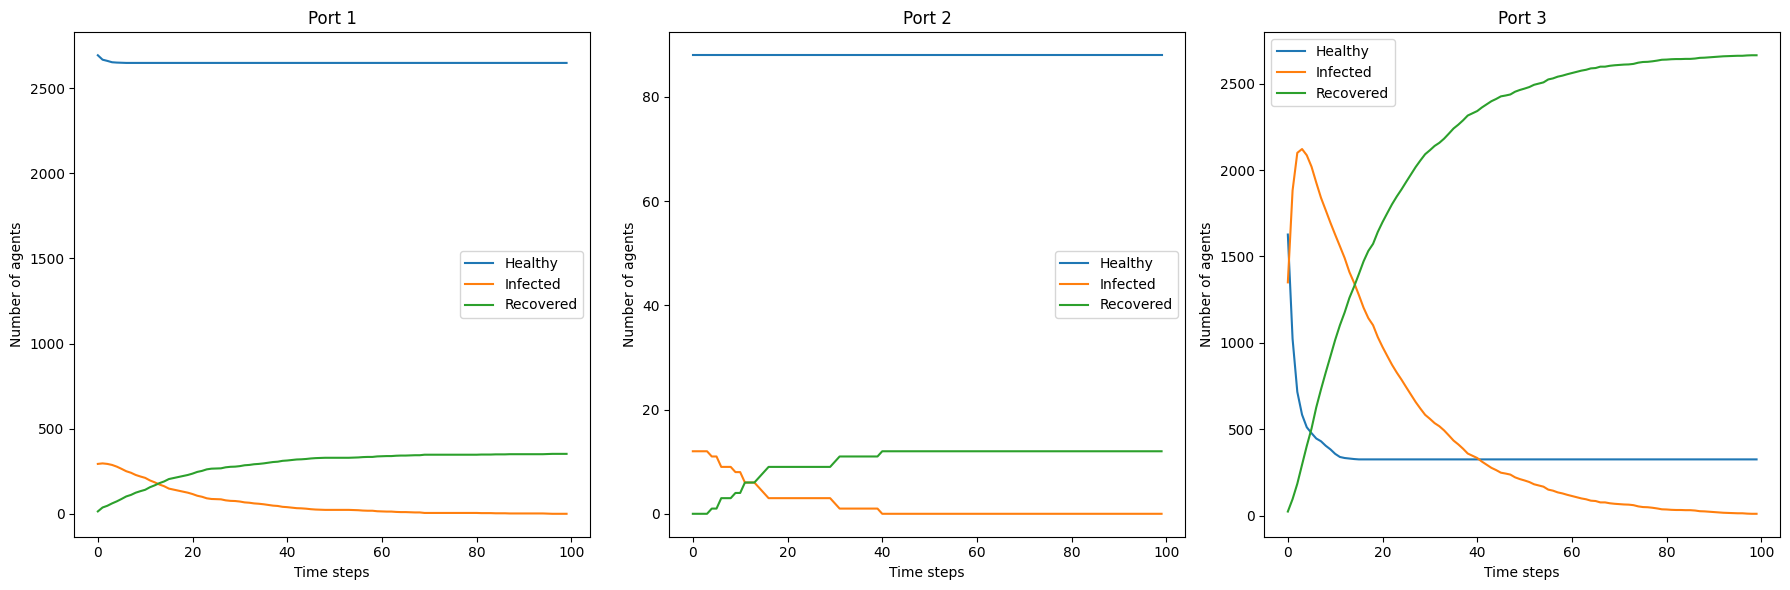

In [10]:
# Plot the results
time_steps = np.arange(0, n_days * n_steps_per_day)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Port 1")
plt.plot(time_steps, port1_healthy, label='Healthy')
plt.plot(time_steps, port1_infected, label='Infected')
plt.plot(time_steps, port1_recovered, label='Recovered')
plt.xlabel('Time steps')
plt.ylabel('Number of agents')
plt.legend()

plt.subplot(1, 3, 2)
plt.title("Port 2")
plt.plot(time_steps, port2_healthy, label='Healthy')
plt.plot(time_steps, port2_infected, label='Infected')
plt.plot(time_steps, port2_recovered, label='Recovered')
plt.xlabel('Time steps')
plt.ylabel('Number of agents')
plt.legend()

plt.subplot(1, 3, 3)
plt.title("Port 3")
plt.plot(time_steps, port3_healthy, label='Healthy')
plt.plot(time_steps, port3_infected, label='Infected')
plt.plot(time_steps, port3_recovered, label='Recovered')
plt.xlabel('Time steps')
plt.ylabel('Number of agents')
plt.legend()

plt.tight_layout()
plt.show()